In [1]:
import numpy as np

In [223]:
import seaborn as sns

In [2]:
np.__version__  #현재 사용중인 numpy 버전 확인

'1.19.1'

# zeros(), nonzero()

In [4]:
z = np.zeros((10, 10))
print(z.size) #요소 개수
print(z.itemsize) #한 요소 당 사이즈 : 8바이트

100
8


In [7]:
z = np.arange(10)
z[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [8]:
np.nonzero([1,2,0,0,3]) #0이 아닌 요소가 위치한 인덱스

(array([0, 1, 4], dtype=int64),)

In [12]:
z = np.random.random((10, 10)) #0이상 1미만 사이에서 난수 발생

# min(), max(), mean()

In [13]:
#최소값
print(z.min())
#최대값
print(z.max())
#평균값
print(z.mean())

0.005789833776627562
0.977045417522283
0.502237361840447


# Padding

In [54]:
# 10*10배열 생성
# 테두리는 모두 1, 내부는 0으로 채우기

#방법1
z1 = np.zeros((10, 10))
for i in range(10):
    z1[i][0], z1[i][9], z1[0][i], z1[9][i] = 1, 1, 1, 1
print(z1)    

#방법2
z2 = np.ones((10, 10))
z2[1:-1, 1:-1] = 0
print(z2)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [28]:
#패딩(padding): 배열의 크기를 고정길이로 만드는 작업
a = [1,2,3]
print(np.pad(a, 1, constant_values=0)) #좌/우에 0이 채워짐
print(np.pad(a, (2,3), constant_values=0)) #좌 2개/우 3개에 0이 채워짐
print(np.pad(a, (0,3), constant_values=0)) #우에 3개 0이 채워짐

[0 1 2 3 0]
[0 0 1 2 3 0 0 0]
[1 2 3 0 0 0]


In [31]:
b = np.arange(1,7).reshape(2,3)
print(np.pad(b, pad_width=1, constant_values=0))
print(np.pad(b, ((1,1),(2,2)), constant_values=0))
             #((상,하),(좌,우))

[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [36]:
c = [[1,2],
    [4,5,6],
    [7]] #리스트 형태

np.array(c) #배열(array) 형태

c:\users\i\pycharmprojects\multicampus-deeplearning-based-ai-engineering\venv\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
c:\users\i\pycharmprojects\multicampus-deeplearning-based-ai-engineering\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([list([1, 2]), list([4, 5, 6]), list([7])], dtype=object)

In [50]:
#모든 행의 길이가 5로 일정하게 통일
def twoDArray(c, fixedLength=5, paddingValue=0):
    rows = []
    for a in c:
        rows.append(np.pad(a, (0, fixedLength),
                           constant_values=paddingValue)[:fixedLength])
    rows #[array([1, 2, 0, 0, 0]), array([4, 5, 6, 0, 0]), array([7, 0, 0, 0, 0])]
    concatrows = np.concatenate(rows, axis=0) 
    #concatenate : numpy배열 여러개를 하나로 합치는 함수
    return concatrows.reshape(-1,fixedLength)

twoDArray(c, fixedLength=5, paddingValue=0)

array([[1, 2, 0, 0, 0],
       [4, 5, 6, 0, 0],
       [7, 0, 0, 0, 0]])

In [56]:
# 10*10배열
# 바깥쪽 테두리는 0, 안쪽은 1

#방법 : 패딩(padding) 이용하기
arr = np.ones((8, 8))
np.pad(arr, pad_width=1, constant_values=0)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# 대각행렬  
: 대각성분을 제외한 모든 성분이 0인 정방행렬

In [61]:
np.diag([3,2,0]) #대각행렬의 대각성분을 3,2,0d으로 지정

array([[3, 0, 0],
       [0, 2, 0],
       [0, 0, 0]])

In [60]:
x = np.arange(9).reshape(3,3)
print(np.diag(x)) #x배열의 대각요소만 출력
print(np.diag(np.diag(x)))

[0 4 8]
[[0 0 0]
 [0 4 0]
 [0 0 8]]


# tile 함수
: 원하는 크기만큼 반복하여 붙여넣기 하는 함수

In [65]:
a = np.array([0,1,2])

print(np.tile(a, 2))
print(np.tile(a, (2, 1)))
print(np.tile(a, (2, 2)))

[0 1 2 0 1 2]
[[0 1 2]
 [0 1 2]]
[[0 1 2 0 1 2]
 [0 1 2 0 1 2]]


In [72]:
"""
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
"""

#tile함수 사용하지 않고 array만들기
z = np.zeros((8,8), dtype=int)
z[1::2, ::2] =  1
z[::2, 1::2] = 1
print(z)

#tile함수를 이용하여 위와 같은 array 만들기
z2 = np.tile(np.array([[0,1],[1,0]]), (4, 4))
print(z2)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# 표준화  
: (요소값-평균) / 표준편차

In [74]:
z = np.random.random((5, 4))
z

array([[0.35327159, 0.34164597, 0.133036  , 0.44952228],
       [0.48711321, 0.67687194, 0.35439275, 0.72362774],
       [0.50735425, 0.96281128, 0.19595904, 0.72273221],
       [0.90754249, 0.56033416, 0.2059217 , 0.99877911],
       [0.86104877, 0.76966877, 0.96451291, 0.76623983]])

In [77]:
print(np.mean(z)) #전체평균
print(np.mean(z, axis=0)) #각 칼럼 평균
print(np.mean(z, axis=1)) #각 행 평균

print(np.std(z)) #표준편차

0.5971193009539306
[0.62326606 0.66226642 0.37076448 0.73218023]
[0.31936896 0.56050141 0.5972142  0.66814437 0.84036757]
0.26915230138426316


In [78]:
#전체 데이터 표준화 : (전체 각 데이터 - 전체 데이터 평균) / 전체 표준편차
(z-np.mean(z))/(np.std(z)) 

array([[-0.24384771, -0.25547333, -0.4640833 , -0.14759702],
       [-0.11000609,  0.07975264, -0.24272655,  0.12650844],
       [-0.08976505,  0.36569198, -0.40116026,  0.12561291],
       [ 0.31042319, -0.03678514, -0.3911976 ,  0.40165981],
       [ 0.26392947,  0.17254947,  0.36739361,  0.16912053]])

In [85]:
z = np.arange(10, 30).reshape(4,5)
print(z)
#각 열 표준화 : (각 열 데이터 - 각 열 데이터 평균) / 각 열 표준편차
std_z = (z-np.mean(z, axis=0))/(np.std(z, axis=0)) 
print(std_z)

#각 열 정규화 : (각 열 데이터 - 열 최소값)/열 최대값-열 최소값
norm_z = (z-np.min(z, axis=0)) / (np.max(z, axis=0)-np.min(z, axis=0))
print(norm_z)

[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
[[-1.34164079 -1.34164079 -1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079  1.34164079  1.34164079]]
[[0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.        ]]


# matrix(행렬) 연산

In [97]:
print(np.ones((5,3)))
print(np.ones((5,3)))

np.dot(np.ones((5,3)), np.ones((3,2))) #행렬 곱셈(dot product)
np.ones((5,3)) @ np.ones((3,2)) #행렬 곱셈(dot product) : 위와 같은 표현
# np.ones((5,3))*np.ones((5,3)) 
# => Error! 요소 간 곱셈(element-wise product)는 행렬의 크기가 같아야함

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


array([[3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.]])

# 조건문

In [106]:
z = np.arange(11)
print(z)
#조건식 ->  4,5,6,7,8 을 음수로 변경

#boolean참조 실행
z[(z>3) & (z<9)] *= -1
print(z)

#np.where 사용
np.where(z>3 , np.where(z<9, -z, z), z)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3 -4 -5 -6 -7 -8  9 10]


array([ 0,  1,  2,  3, -4, -5, -6, -7, -8,  9, 10])

# 집합

In [116]:
z1 = np.random.randint(0, 10, 10) #0<=정수난수<10
z2 = np.random.randint(0, 10, 10)

print(z1)
print(z2)

[9 7 0 7 2 1 4 6 2 8]
[3 4 3 9 7 7 0 4 2 5]


In [117]:
np.intersect1d(z1, z2) #두 집합의 교집합(공통요소)

array([0, 2, 4, 7, 9])

In [118]:
np.unique(z1) # z1집합내에 유일한 요소만 추출(중복제거)

array([0, 1, 2, 4, 6, 7, 8, 9])

In [119]:
np.union1d(z1, z2) # 두 집합의 합집합

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [120]:
np.in1d(z1, z2) #z1이 z2 배열의 원소를 포함하고 있는지 여부를 불린형으로 출력

array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False])

In [121]:
np.setdiff1d(z1, z2) #차집합:z1-z2 => z1의 요소 중 z2에는 없는 요소만 출력

array([1, 6, 8])

In [ ]:
np.setxor1d(z1, z2) #대칭차집합 : z1과 z2의 합집합에서 교집합을 뺀 것

# 논리함수

In [122]:
a = np.arange(1,7).reshape(2,3)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [125]:
x1 = a%2==0 #2로 나눈 나머지
x1

array([[False,  True, False],
       [ True, False,  True]])

In [126]:
x2 = a>=4
x2

array([[False, False, False],
       [ True,  True,  True]])

In [130]:
#x1과 x2의 논리곱 연산(모두 True일 때만 True 출력)
np.logical_and(x1, x2)

#True의 개수를 세고 싶을 때:
np.sum(np.logical_and(x1, x2))

np.sum(a*np.logical_and(x1, x2)) #True에 해당하는 요소만 합합 것 : 4+6
# [[1, 2, 3],   *   [[False,  True, False],
#  [4, 5, 6]]       [ True, False,  True]]

10

In [131]:
#x1과 x2의 논리곱 연산(모두 True일 때만 True 출력)
np.logical_or(x1, x2)

array([[False,  True, False],
       [ True,  True,  True]])

In [129]:
np.logical_xor(x1, x2) #서로 다른 경우에는 1, 서로 같은 경우는 0

array([[False,  True, False],
       [False,  True, False]])

# 날짜 표현  
: RNN에서 주로 사용

In [133]:
print(np.datetime64('today')) #np.datetime64('today', 'D')
print(np.datetime64('today', 'M'))
print(np.datetime64('today', 'Y'))

2020-08-18
2020-08
2020


In [134]:
np.datetime64('today', 'D')-1 #연산가능 (date타입의 데이터이므로)

numpy.datetime64('2020-08-17')

In [135]:
np.datetime64('today', 'M')+2

numpy.datetime64('2020-10')

In [136]:
np.datetime64('today', 'D')-np.timedelta64(1, 'D')
#delta : 변화를 의미
#(1, 'D')는 하루를 의미

numpy.datetime64('2020-08-17')

날짜데이터를 array를 이용하여 출력

In [141]:
np.arange('2020-08', '2020-12', dtype='datetime64[D]')

array(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
       '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
       '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12',
       '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16',
       '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
       '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
       '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
       '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01',
       '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05',
       '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
       '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13',
       '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
       '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21',
       '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
       '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
       '2020-09-30', '2020-10-01', '2020-10-02', '2020-

In [142]:
np.arange('2020-08', '2021-01', dtype='datetime64[M]')

array(['2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
      dtype='datetime64[M]')

In [147]:
a = np.ones(3)*1 #[1. 1. 1.]
b = np.ones(3)*2 #[2. 2. 2.]
c = np.ones(3)*3 #[3. 3. 3.]

In [148]:
np.add(a,b, out=b) #요소 간 덧셈하여 b에 저장
b

array([3., 3., 3.])

In [149]:
np.divide(a, 2, out=a) #a요소를 각각 2로 나눈 값을 a에 저장
a

array([0.5, 0.5, 0.5])

In [151]:
np.negative(a, out=a) #음수
a

array([-0.5, -0.5, -0.5])

In [152]:
np.multiply(a, b, out=a) #요소 간 곱셈

array([-1.5, -1.5, -1.5])

# 실수연산

In [153]:
z = np.random.uniform(0, 10, 10)
z

array([9.43607638, 4.07550178, 3.66135464, 1.774181  , 9.70093572,
       1.21502687, 2.10169062, 5.54275618, 5.06176004, 4.02329149])

In [158]:
print(z%1) #소수점 자리만 추출
print(z-(z%1)) #정수 부분만 추출

[0.43607638 0.07550178 0.66135464 0.774181   0.70093572 0.21502687
 0.10169062 0.54275618 0.06176004 0.02329149]
[9. 4. 3. 1. 9. 1. 2. 5. 5. 4.]


In [159]:
print(np.floor(z)) #소수점을 버림 => 내림
print(np.ceil(z)-1) #올림

[9. 4. 3. 1. 9. 1. 2. 5. 5. 4.]
[9. 4. 3. 1. 9. 1. 2. 5. 5. 4.]


In [160]:
z.astype(int) #실수형을 int(정수)형으로 변형

array([9, 4, 3, 1, 9, 1, 2, 5, 5, 4])

In [161]:
np.trunc(z) #내림 => floor()과 차이 : trunc()함수는 
            #       내림을 하더라도 0으로 향하는 반면 
            #       floor() 함수는 무조건 아래만 향해 내림

array([9., 4., 3., 1., 9., 1., 2., 5., 5., 4.])

# 좌표 구간 나누기

In [162]:
#np.linspace(순열시작값, 순열끝값, 샘플개수)
#시각화할 때 x축 설정

np.linspace(start=0, stop=10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [163]:
np.linspace(start=0, stop=10, num=5, endpoint=False) #10을 포함할지 말지 옵션

array([0., 2., 4., 6., 8.])

# enumerate() 함수

In [167]:
nameList = ['kim', 'lee', 'park', 'choi']

for name in enumerate(nameList):
    print(name)

for i, name in enumerate(nameList):
    print(i, name)

(0, 'kim')
(1, 'lee')
(2, 'park')
(3, 'choi')
0 kim
1 lee
2 park
3 choi


# argmax() 함수

In [176]:
z = np.random.random(10)
z

array([0.26841841, 0.0850837 , 0.79537502, 0.63916919, 0.69202694,
       0.67737565, 0.3780037 , 0.86959857, 0.57014795, 0.99739329])

In [177]:
#argmax : 최대값의 인덱스를 반환
#z 데이터 중에서 최대값을 0으로 변경
z[z.argmax()] = 0
z

array([0.26841841, 0.0850837 , 0.79537502, 0.63916919, 0.69202694,
       0.67737565, 0.3780037 , 0.86959857, 0.57014795, 0.        ])

# meshgrid() 함수

In [ ]:
# 시각화, 그리드 형식 출력
# 변수가 2개, 2차원 함수의 그래프 출력, 표 작성 <-- 2차원 좌표값의 순서쌍
# meshgrid : (x, y) 가로점과 세로점 벡터를 입력받아 좌표값 쌍을 생성해줌.

In [202]:
x = np.arange(3)
y = np.arange(5)

In [179]:
np.meshgrid(x, y)

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])]

In [203]:
x, y = np.meshgrid(x, y)

In [204]:
y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [205]:
res = [list(zip(x,y)) for x,y in zip(x,y)]
res

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

In [190]:
import matplotlib.pyplot as plt

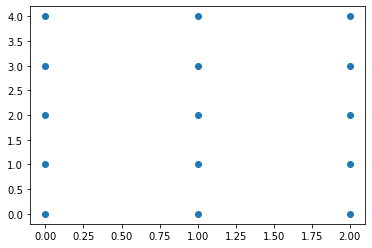

In [206]:
plt.scatter(x, y)

# argmin() 함수

In [196]:
z = np.arange(100)
v = np.random.uniform(0, 100)
v

54.388166082525146

In [216]:
# v값에 가장 가까운 깂을 z에서 찾으시오 : 54
z[np.argmin(abs(z-v))]

# idx = (np.abs(z-v)).argmin()
# z[idx]

54

# random함수

In [217]:
np.random.seed(1004)

In [218]:
x = np.arange(10)
np.random.shuffle(x)

In [219]:
x #seed가 같으면 suffle한 값도 같은 값이 나옴

array([0, 6, 8, 9, 1, 4, 3, 7, 5, 2])

In [220]:
np.random.choice(5, 5, replace=False) #np.random.shuffle(np.arange(5))과 같은 의미
                                      #비복원추출

array([1, 2, 3, 4, 0])

In [221]:
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0]) #p는 추출될 확률
#0~4까지의 숫자를 10번 랜덤으로 추출

array([3, 2, 3, 3, 3, 3, 3, 0, 3, 3])

c:\users\i\pycharmprojects\multicampus-deeplearning-based-ai-engineering\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(-100, 100 + 1) instead
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

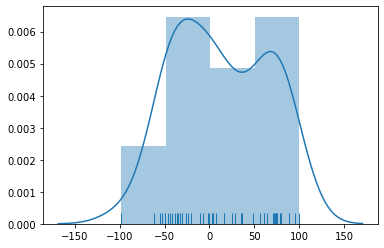

In [225]:
x = np.random.random_integers(-100, 100, 50) #-100~100 중에 랜덤하게 50개 추출
sns.distplot(x, rug=True) #각 숫자가 나올 확률을 시각화

# bincount 함수

<AxesSubplot:>

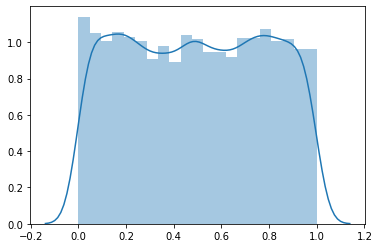

In [226]:
x = np.random.rand(10000) #0~1사이의 난수, 균등하게 분포
sns.distplot(x)

<AxesSubplot:>

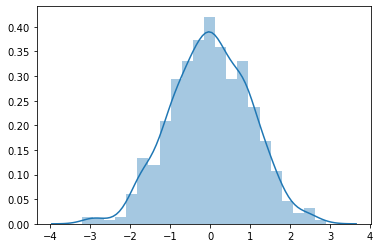

In [227]:
x = np.random.randn(1000) #표준정규분포
sns.distplot(x)

In [228]:
np.unique([1,1,2,2,3,3])

array([1, 2, 3])

In [231]:
np.unique([[1,2,2], [2,2,3]])

array([1, 2, 3])

In [234]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
idx, cnt = np.unique(a, return_counts=True)
#유일한 요소들을 먼저 추출하고, 해당 각 요소의 개수를 뒤에 추출
print(idx)
print(cnt)

['a' 'b' 'c']
[2 2 1]


In [236]:
np.bincount([1,1,2,2,2,4,4]) 
# minlength가 없으면 0부터 최대 요소 값까지 인덱스를 배열로 생성하여 
# 해당 요소의 개수를 인덱스 차례대로 표현

array([0, 2, 3, 0, 2], dtype=int64)

In [237]:
np.bincount([1,1,2,2,2,4,4], minlength=10)

array([0, 2, 3, 0, 2, 0, 0, 0, 0, 0], dtype=int64)

In [239]:
x = np.random.randn(100) #평균:0, 표준편차:1
print(x.mean()) #평균
print(x.std()) #표준편차
print(x.var()) #분산

-0.09368738545604063
1.0995872960608073
1.2090922216583175


# einsum(아인슈타인 표기법)   
 * 전치행렬, 행렬의 내적 및 외적을 구할때 사용  
 * einsum("첨자1, 첨자2 -> 첨자", 텐서1, 텐서2)

In [242]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [244]:
#아인슈타인 표기법
#전치행렬
np.einsum('ij->ji', a)

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [250]:
#a행렬의 모든 원소 : aij
np.einsum("ij->", a) #a행렬 모든 요소의 합
np.einsum('ii ->', a) #대각요소의 합

60

In [251]:
np.einsum('ij -> j', a) #각 행의 합
np.einsum('ij -> i', a) #각 열의 합

array([ 10,  35,  60,  85, 110])